# ROC curve comparison PyMC3, susie, varbvs, logit
ROC curve for comparing methods, susie calibrate

In [1]:
import pandas as pd, numpy as np
import os
from collections import Counter
cwd = os.path.expanduser("/home/min/GIT/cnv-gene-mapping/data")

In [2]:
varbvs = pd.read_csv(f"{cwd}/deletion_simu/deletion.genes.block30.for_simu.sample.genes.varbvs.all.blocks.pip.csv", header = None, names = ["varbvs_pip"])
susie = pd.read_csv(f"{cwd}/deletion_simu/deletion.genes.block30.for_simu.sample.genes.SuSiE.L_1.susie.all.blocks.pip.csv", header = None, names = ["susie_pip"])
logit = pd.read_csv(f"{cwd}/deletion_simu/deletion.genes.block30.for_simu.sample.genes.logit.all.blocks.pip.csv", header = None, names = ["logit_pip"])
pymc3 = pd.read_csv(f"{cwd}/deletion_simu/deletion.genes.block30.for_simu.sample.genes.pymc3.all.blocks.pip.gz", compression = "gzip", header = None, names = ["pymc3_pip"])

In [3]:
beta = pd.read_csv(f"{cwd}/deletion_simu/deletion.genes.block30.for_simu.sample.shape0.0.scale1.0.beta", header = None, names = ["beta"])
index = pd.read_csv(f"{cwd}/deletion_simu/deletion.genes.block30.for_simu.sample.block1.forsimu.index.csv", header = None, names = ["s", "e"], sep = '\t')

In [4]:
b1 = list()
for i, x in index.iterrows():
    b1.extend([j for j in range(x["s"], x["e"]+1)])

In [5]:
len(b1)

2285

In [6]:
beta = beta.iloc[b1]
beta = beta.set_index([[i for i in range(beta.shape[0])]])

In [7]:
res = pd.concat([beta, varbvs, susie, logit, pymc3], axis = 1)

In [8]:
res["is_signal"] = res["beta"].apply(lambda x: 1 if x != 0 else 0)

In [9]:
res.head(10)

,beta,varbvs_pip,susie_pip,logit_pip,pymc3_pip,is_signal
0,-0.000000,0.072735,0.0,0.125,0.0365,0
1,-0.000000,0.072734,0.0,0.125,0.0450,0
2,-0.417782,0.072733,0.0,0.125,0.0515,1
3,0.000000,0.072733,0.0,0.125,0.0405,0
4,0.000000,0.072732,0.0,0.125,0.0465,0
5,0.000000,0.072731,0.0,0.125,0.0430,0
6,0.000000,0.072731,0.0,0.125,0.0485,0
7,-0.000000,0.072730,0.0,0.125,0.0345,0
8,0.000000,0.065478,0.0,0.100,0.0390,0
9,-0.000000,0.065478,0.0,0.100,0.0370,0


In [10]:
calib = res[["varbvs_pip", "susie_pip", "logit_pip", "pymc3_pip", "is_signal"]]

In [11]:
cutoffs = [0.025*i for i in range(0,41)]

In [12]:
res1 = pd.DataFrame({"cutoff": cutoffs})

In [13]:
n1 = len(b1)
n2 = sum(res["is_signal"])

In [14]:
for x in ["varbvs_pip", "susie_pip", "logit_pip", "pymc3_pip"]:
    res1[f"{x}_FDR"] = [sum(res[x]>i)/n1 for i in cutoffs]
    res1[f"{x}_power"] = [res[(res[x]>i) & (res["is_signal"] == 1)].shape[0]/n2 for i in cutoffs]

In [15]:
res1.head(20)

,cutoff,varbvs_pip_FDR,varbvs_pip_power,susie_pip_FDR,susie_pip_power,logit_pip_FDR,logit_pip_power,pymc3_pip_FDR,pymc3_pip_power
0,0.000,1.000000,1.000000,0.420569,0.716667,1.000000,1.000000,1.000000,1.000000
1,0.025,0.899344,0.900000,0.331729,0.666667,0.856455,0.925000,0.757987,0.891667
2,0.050,0.710284,0.741667,0.217505,0.525000,0.693654,0.775000,0.383807,0.791667
3,0.075,0.466083,0.558333,0.169803,0.458333,0.565864,0.658333,0.221444,0.658333
4,0.100,0.347921,0.450000,0.139606,0.375000,0.488403,0.583333,0.154923,0.533333
5,0.125,0.254267,0.333333,0.111597,0.300000,0.418818,0.483333,0.108972,0.458333
6,0.150,0.180744,0.250000,0.105033,0.283333,0.395624,0.450000,0.062144,0.308333
7,0.175,0.143107,0.233333,0.096718,0.250000,0.375492,0.408333,0.043764,0.258333
8,0.200,0.112910,0.225000,0.084902,0.225000,0.329978,0.375000,0.034136,0.216667
9,0.225,0.059956,0.158333,0.084464,0.225000,0.315098,0.366667,0.029759,0.200000


In [16]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_prop = font_manager.FontProperties(size=24)

In [58]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

x=np.array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2])
y=np.array([0.57,0.85,0.66,0.84,0.59,0.55,0.61,0.76,0.54,0.55,0.48])

x_new = np.linspace(x.min(), x.max(),500)

f = interp1d(x, y, kind='quadratic')
y_smooth=f(x_new)

plt.plot (x_new,y_smooth)
plt.scatter (x, y)
plt.show()

In [72]:
from scipy.interpolate import interp1d
f2 = interp1d(np.array(res1["varbvs_pip_FDR"])[::-1], np.array(res1["varbvs_pip_power"])[::-1], kind='next')
# f2 = interp1d(x, y, kind='quadratic')

In [73]:
np.array(res1["varbvs_pip_FDR"])

array([1.        , 0.89934354, 0.71028446, 0.46608315, 0.34792123,
       0.25426696, 0.18074398, 0.14310722, 0.11291028, 0.05995624,
       0.04989059, 0.03938731, 0.02669584, 0.02231947, 0.01531729,
       0.01269147, 0.01269147, 0.01269147, 0.01181619, 0.01181619,
       0.01137856, 0.01050328, 0.01006565, 0.01006565, 0.01006565,
       0.00962801, 0.00875274, 0.00875274, 0.00875274, 0.0083151 ,
       0.0083151 , 0.00787746, 0.00743982, 0.00700219, 0.00700219,
       0.00612691, 0.00612691, 0.00612691, 0.00568928, 0.00525164,
       0.        ])

In [75]:
fig, ax = plt.subplots(figsize = (10, 10))
plt.scatter(res1["varbvs_pip_FDR"], res1["varbvs_pip_power"], c = "C4", label='varbvs')
plt.plot(res1["varbvs_pip_FDR"], res1["varbvs_pip_power"], c = "C4")
plt.scatter(res1["susie_pip_FDR"], res1["susie_pip_power"], c = "C8", label='susie')
plt.plot(res1["susie_pip_FDR"], res1["susie_pip_power"], c = "C8")
plt.scatter(res1["logit_pip_FDR"], res1["logit_pip_power"], c = "C0", label='logit')
plt.plot(res1["logit_pip_FDR"], res1["logit_pip_power"], c = "C0")
plt.scatter(res1["pymc3_pip_FDR"], res1["pymc3_pip_power"], c = "C3", label='pymc3')
plt.plot(res1["pymc3_pip_FDR"], res1["pymc3_pip_power"], c = "C3")
plt.legend(loc = 'lower right', fontsize = 20)
plt.xlabel("FDR", fontproperties=font_prop)
plt.ylabel("power", fontproperties=font_prop)
plt.savefig("/home/min/GIT/cnv-gene-mapping/data/deletion_simu/ROC.pdf")
plt.show()

> /home/min/GIT/cnv-gene-mapping/data/deletion_simu/ROC.pdf (16.0 KiB):

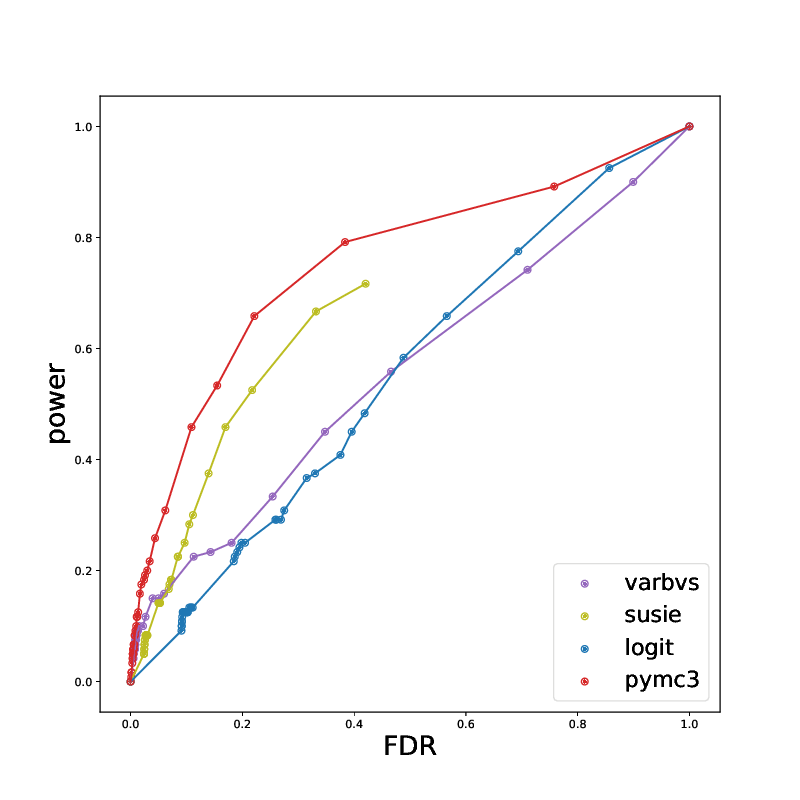

In [76]:
%preview /home/min/GIT/cnv-gene-mapping/data/deletion_simu/ROC.pdf -s png --dpi 80

In [17]:
%get calib

In [18]:
library(ggplot2)
library(cowplot)
library(dplyr)


Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [19]:
dat = readRDS("/home/min/Downloads/susie_rss_ukb_default_pip_AZFALSE_ldin_sample_ERFALSE_lamb0.rds")

In [20]:
bin_size = 20
bins = cbind(seq(1:bin_size)/bin_size-1/bin_size, seq(1:bin_size)/bin_size)

In [21]:
names(dat$"1")

[1] "susie"     "susierss"  "caviar"    "finemap"   "finemapv3" "is_signal"

In [22]:
length(dat$"5"$susie)

[1] 193200

In [23]:
head(dat$"1")

susie,susierss,caviar,finemap,finemapv3,is_signal
0.000000e+00,0.000000e+00,1.76819e-14,0,1.55245e-21,0
0.000000e+00,0.000000e+00,2.56029e-15,0,8.17248e-23,0
0.000000e+00,0.000000e+00,1.20962e-15,0,2.60620e-23,0
1.622369e-11,1.072831e-11,9.47974e-08,0,2.61119e-11,0
0.000000e+00,0.000000e+00,1.74937e-14,0,1.52735e-21,0
0.000000e+00,0.000000e+00,1.74010e-14,0,1.51504e-21,0


In [24]:
table(dat$"1"$is_signal)


     0      1 
199420    200 

In [25]:
head(calib)

,varbvs_pip,susie_pip,logit_pip,pymc3_pip,is_signal
0,0.07273518,0,0.125,0.0365,0
1,0.07273428,0,0.125,0.0450,0
2,0.07273342,0,0.125,0.0515,1
3,0.07273260,0,0.125,0.0405,0
4,0.07273186,0,0.125,0.0465,0
5,0.07273124,0,0.125,0.0430,0


In [26]:
pip_cali = list()
for (name in rev(colnames(calib))[-1]) {
    for (i in 1:nrow(bins)) {
        tmp = calib[which(calib[[name]] > bins[i,1] & calib[[name]] < bins[i,2]), ]
        if (is.null(pip_cali[[name]])) pip_cali[[name]] = c(sum(tmp[[name]]), sum(tmp$is_signal), length(tmp$is_signal))
        else pip_cali[[name]] = rbind(pip_cali[[name]], c(sum(tmp[[name]]), sum(tmp$is_signal), length(tmp$is_signal)))
    }
    pip_cali[[name]][which(is.na(pip_cali[[name]]))] = 0
}

In [61]:
pip_cali = list()
for (s in 1:length(dat)) { # 1,2,3,4,5
    res = dat[[as.character(s)]] # res = calib
    pip_cali[[as.character(s)]] = list()
    for (name in rev(colnames(res))[-1]) { # susie, susierss, caviar, finemap, finemapv3, is_signal
        for (i in 1:nrow(bins)) {
            tmp = res[which(res[[name]] > bins[i,1] & res[[name]] < bins[i,2]),]
            if (is.null(pip_cali[[as.character(s)]][[name]])) pip_cali[[as.character(s)]][[name]] = c(sum(tmp[[name]]), sum(tmp$is_signal), length(tmp$is_signal))
            else pip_cali[[as.character(s)]][[name]] = rbind(pip_cali[[as.character(s)]][[name]], c(sum(tmp[[name]]), sum(tmp$is_signal), length(tmp$is_signal)))
        }
        pip_cali[[as.character(s)]][[name]][which(is.na(pip_cali[[as.character(s)]][[name]]))] = 0
    }
}

In [27]:
get_cali = function(alist, col) { # alist = pip_cali
    res = alist[[col]]
    if (!is.null(alist[[col]])) res = res + alist[[col]]
    res[,c(1,2)] = res[,c(1,2)] / res[,3]
    return(res[-1,])
}

In [28]:
res = get_cali(pip_cali, "logit_pip")

In [111]:
saveRDS(list("susie" = get_cali(pip_cali, 'susie_pip'),
             "logit" = get_cali(pip_cali, 'logit_pip'),
             "varbvs" = get_cali(pip_cali, 'varbvs_pip'),
             "pymc3" = get_cali(pip_cali, 'pymc3_pip')),
             "/home/min/GIT/cnv-gene-mapping/data/deletion_simu/tmp.RDS")

In [121]:
dat = readRDS("/home/min/GIT/cnv-gene-mapping/data/deletion_simu/tmp.RDS")

In [125]:
dot_plot = function(dataframe) {
  ggplot(dataframe, aes(x=mean_pip, y=observed_freq)) +
    geom_errorbar(aes(ymin=observed_freq-se, ymax=observed_freq+se), colour="gray", size = 0.2, width=.01) +
    geom_point(size=1.5, shape=21, fill="#002b36") + # 21 is filled circle
    xlab("Mean PIP") +
    ylab("Observed frequency") +
    coord_cartesian(ylim=c(0,1), xlim=c(0,1)) +
    geom_abline(slope=1,intercept=0,colour='red', size=0.2) +
    ggtitle(name) +
    expand_limits(y=0) + 
    theme_cowplot()
}

In [130]:
idx = 0
for (name in names(dat)) {
    idx = idx + 1
    dat[[name]][,3] = sqrt(dat[[name]][,2] * (1 - dat[[name]][,2]) / dat[[name]][,3]) * 2
    dat[[name]] = as.data.frame(dat[[name]])
    colnames(dat[[name]]) = c("mean_pip", "observed_freq", "se")
    pdf(paste0("/home/min/GIT/cnv-gene-mapping/data/deletion_simu/", name, '_' , idx, '.pdf'), width=3, height=3, pointsize=16)
    print(dot_plot(dat[[name]]))
    dev.off()
    system(paste0("convert -flatten -density 120 ", "/home/min/GIT/cnv-gene-mapping/data/deletion_simu/", name, '_' , idx, '.pdf', " ", 
                  "/home/min/GIT/cnv-gene-mapping/data/deletion_simu/", name, '_' , idx, '.png'))
}

Warning message:
“Removed 12 rows containing missing values (geom_errorbar).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 8 rows containing missing values (geom_errorbar).”Warning message:
“Removed 8 rows containing missing values (geom_errorbar).”Warning message:
“Removed 2 rows containing missing values (geom_point).”Warning message:
“Removed 8 rows containing missing values (geom_errorbar).”Warning message:
“Removed 2 rows containing missing values (geom_point).”

In [122]:
names(dat)

[1] "susie"  "logit"  "varbvs" "pymc3"

In [29]:
library(ggplot2)
library(cowplot)
library(dplyr)
## Functions
get_cali = function(alist, col) {
  res = alist[[1]][[col]]
  if(length(alist) > 1){
    for (i in 2:length(alist)) {
      if (!is.null(alist[[i]][[col]])) res = res + alist[[i]][[col]]
    }
  }
  res[,c(1,2)] = res[,c(1,2)] / res[,3]
  return(res[-1,])
}
dot_plot = function(dataframe) {
  ggplot(dataframe, aes(x=mean_pip, y=observed_freq)) +
    geom_errorbar(aes(ymin=observed_freq-se, ymax=observed_freq+se), colour="gray", size = 0.2, width=.01) +
    geom_point(size=1.5, shape=21, fill="#002b36") + # 21 is filled circle
    xlab("Mean PIP") +
    ylab("Observed frequency") +
    coord_cartesian(ylim=c(0,1), xlim=c(0,1)) +
    geom_abline(slope=1,intercept=0,colour='red', size=0.2) +
    ggtitle(name) +
    expand_limits(y=0) +                        # Expand y range
    theme_cowplot()
}

## parameters
addz = c(FALSE, TRUE)
ldmethod = c('in_sample', 'ref_sample')
estimate_resid = c(FALSE, TRUE)
lambda = c(0, 1e-04, 0.1)
all.comb = expand.grid(addz, ldmethod, estimate_resid, lambda)
colnames(all.comb) = c('addz', 'ldmethod', 'estimate_resid', 'lambda')
all.comb = all.comb %>% filter(!(ldmethod == 'in_sample' & addz == TRUE))

bin_size = 20
pip_cutoff = 0

for (case in 1:nrow(all.comb)){
  addz = all.comb[case, 'addz']
  ldmethod = all.comb[case, 'ldmethod']
  estimate_resid = all.comb[case, 'estimate_resid']
  lambda = all.comb[case, 'lambda']
  input = "/home/min/Downloads/susie_rss_ukb_default_pip_AZFALSE_ldin_sample_ERFALSE_lamb0.rds"
  output_name = "/home/min/Downloads/tmp"
  output = paste0(output_name,'.rds')
  
  dat = readRDS(input)
  pip_cali = list()
  bins = cbind(seq(1:bin_size)/bin_size-1/bin_size, seq(1:bin_size)/bin_size)
  for (s in 1:length(dat)) {
    res = dat[[as.character(s)]]
    pip_cali[[as.character(s)]] = list()
    for (name in rev(colnames(res))[-1]) {
      for (i in 1:nrow(bins)) {
        tmp = res[which(res[[name]] > bins[i,1] & res[[name]] < bins[i,2]),]
        if (is.null(pip_cali[[as.character(s)]][[name]])) pip_cali[[as.character(s)]][[name]] = c(sum(tmp[[name]]), sum(tmp$is_signal), length(tmp$is_signal))
        else pip_cali[[as.character(s)]][[name]] = rbind(pip_cali[[as.character(s)]][[name]], c(sum(tmp[[name]]), sum(tmp$is_signal), length(tmp$is_signal)))
      }
      pip_cali[[as.character(s)]][[name]][which(is.na(pip_cali[[as.character(s)]][[name]]))] = 0
    }
  }
  saveRDS(list("SuSiE"=get_cali(pip_cali, 'susie'),
               "SuSiE-RSS"=get_cali(pip_cali, 'susierss'),
               "CAVIAR"=get_cali(pip_cali, 'caviar'),
               "FINEMAP"=get_cali(pip_cali, 'finemap'),
               "FINEMAPv3"=get_cali(pip_cali, 'finemapv3')),
          output)
  
  dat = readRDS(output)
  idx = 0
  for (name in names(dat)) {
    idx = idx + 1
    dat[[name]][,3] = sqrt(dat[[name]][,2] * (1 - dat[[name]][,2]) / dat[[name]][,3]) * 2
    dat[[name]] = as.data.frame(dat[[name]])
    colnames(dat[[name]]) = c("mean_pip", "observed_freq", "se")
    pdf(paste0(output_name, '_' , idx, '.pdf'), width=3, height=3, pointsize=16)
    print(dot_plot(dat[[name]]))
    dev.off()
    system(paste0("convert -flatten -density 120 ", output_name, '_' , idx, '.pdf', " ", output_name, '_' , idx, '.png'))
  }
  files = paste0(output_name, '_', seq(1:idx), '.png')
  cmd = paste('convert +append', paste(files, collapse=" "), paste0(output_name, '.png'))
  system(cmd)
  # system(paste('rm -f', paste(files, collapse=" ")))
  
}

Keyboard Interrupt
